<a href="https://colab.research.google.com/github/brem-21/Titanic/blob/main/Titanic_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Loding the data and print first 5 rows
titanic_data = pd.read_csv('https://raw.githubusercontent.com/brem-21/Titanic/refs/heads/main/Data/train.csv')
titanic_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1


In [3]:
# Information of the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


In [4]:
# Checking for missing values
pd.DataFrame(titanic_data.isnull().sum())

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,137
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,552


In [5]:
# Handling missing values for Embarked column
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Handling missing values for Age column
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

# Handling missing values for Cabin column
titanic_data['Cabin'] = titanic_data['Cabin'].fillna(titanic_data['Cabin'].mode()[0])

In [6]:
# rechecking for missing values
pd.DataFrame(titanic_data.isnull().sum())

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [7]:
# checking for columns for unique values
pd.DataFrame(titanic_data.nunique())

,0
PassengerId,712
Pclass,3
Name,712
Sex,2
Age,86
SibSp,7
Parch,7
Ticket,571
Fare,226
Cabin,127


In [8]:
# Importing the encoder to encode the binary categorical varibales
from sklearn.preprocessing import LabelEncoder, StandardScaler

columns_to_encode = ['Pclass', 'Sex', 'Embarked', 'Survived']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    titanic_data[column] = label_encoder.fit_transform(titanic_data[column])

In [9]:
# Removing Irrelevant columns
titanic_data = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [10]:
features = titanic_data.drop('Survived', axis=1)

In [11]:
# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Optionally, convert the scaled features back into a DataFrame for easier interpretation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)


In [12]:
# Splitting the data into target and features
X = features_scaled_df
y = titanic_data['Survived']

In [13]:
titanic_data.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.145052,-0.315102,0.097900,0.040467,-0.556540,0.197985,-0.348007
Sex,0.145052,1.000000,0.078427,-0.100430,-0.256527,-0.206986,0.127243,-0.549171
Age,-0.315102,0.078427,1.000000,-0.237664,-0.167355,0.101019,-0.033954,-0.076462
SibSp,0.097900,-0.100430,-0.237664,1.000000,0.392269,0.127011,0.061579,-0.026115
Parch,0.040467,-0.256527,-0.167355,0.392269,1.000000,0.177235,0.046178,0.084178
Fare,-0.556540,-0.206986,0.101019,0.127011,0.177235,1.000000,-0.262451,0.275499
Embarked,0.197985,0.127243,-0.033954,0.061579,0.046178,-0.262451,1.000000,-0.188997
Survived,-0.348007,-0.549171,-0.076462,-0.026115,0.084178,0.275499,-0.188997,1.000000


In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k=5)
X_selected_mutual_info = selector_mutual_info.fit_transform(X, y)
selected_features_mutual_info = X.columns[selector_mutual_info.get_support()]
print(f"Selected features using mutual_info_classif: {selected_features_mutual_info}")
print("Feature scores (mutual_info_classif):", selector_mutual_info.scores_)

Selected features using mutual_info_classif: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')
Feature scores (mutual_info_classif): [0.03959613 0.16100659 0.03339089 0.02849694 0.00851479 0.15097355
 0.00377202]


In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_mutual_info, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [16]:
results_before_tuning = []
results_after_tuning = []

In [17]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Define parameter grids for each classifier
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7, 9],
        'random_state':[42, 101, 98]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Function to evaluate model accuracy
def evaluate_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Dictionary to store results
results_before_tuning = []
results_after_tuning = []

# 1. Train models with default parameters (before tuning)
for name, clf in classifiers.items():
    print(f"Training {name} with default parameters...")
    accuracy = evaluate_model(clf, X_train, y_train, X_test, y_test)
    results_before_tuning.append({
        'Model': name,
        'Accuracy (%) Before': round(accuracy * 100, 2)
    })
    print(f"{name} - Accuracy: {round(accuracy * 100, 2)}%\n")

Training Logistic Regression with default parameters...
Logistic Regression - Accuracy: 73.43%

Training Decision Tree with default parameters...
Decision Tree - Accuracy: 76.92%

Training Random Forest with default parameters...
Random Forest - Accuracy: 80.42%

Training Support Vector Classifier with default parameters...
Support Vector Classifier - Accuracy: 79.02%

Training Gradient Boosting with default parameters...
Gradient Boosting - Accuracy: 84.62%

Training K-Nearest Neighbors with default parameters...
K-Nearest Neighbors - Accuracy: 79.02%



In [18]:
# After applying SMOTE, check the class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution after SMOTE:
Survived
1    355
0    355
Name: count, dtype: int64


In [19]:
# 2. Apply GridSearchCV and tune hyperparameters
for name, clf in classifiers.items():
    print(f"Applying GridSearchCV for {name}...")
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model and evaluate it
    best_clf = grid_search.best_estimator_
    accuracy = evaluate_model(best_clf, X_train, y_train, X_test, y_test)

    results_after_tuning.append({
        'Model': name,
        'Accuracy (%) After': round(accuracy * 100, 2)
    })
    print(f"{name} - Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {round(accuracy * 100, 2)}%\n")

Applying GridSearchCV for Logistic Regression...
Logistic Regression - Best Params: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 74.13%

Applying GridSearchCV for Decision Tree...
Decision Tree - Best Params: {'max_depth': 10, 'min_samples_split': 5}
Accuracy: 77.62%

Applying GridSearchCV for Random Forest...
Random Forest - Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 81.12%

Applying GridSearchCV for Support Vector Classifier...
Support Vector Classifier - Best Params: {'C': 10, 'kernel': 'rbf'}
Accuracy: 81.12%

Applying GridSearchCV for Gradient Boosting...
Gradient Boosting - Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'random_state': 42}
Accuracy: 80.42%

Applying GridSearchCV for K-Nearest Neighbors...
K-Nearest Neighbors - Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 78.32%



In [20]:
# Convert results to DataFrames
before_df = pd.DataFrame(results_before_tuning)
after_df = pd.DataFrame(results_after_tuning)

# Merge before and after results for comparison
comparison_df = pd.merge(before_df, after_df, on='Model')

# Display the comparison table
print(comparison_df)


                       Model  Accuracy (%) Before  Accuracy (%) After
0        Logistic Regression                73.43               74.13
1              Decision Tree                76.92               77.62
2              Random Forest                80.42               81.12
3  Support Vector Classifier                79.02               81.12
4          Gradient Boosting                84.62               80.42
5        K-Nearest Neighbors                79.02               78.32


In [21]:
# Assuming comparison_df is a DataFrame with a column named 'accuracy'
best_model = comparison_df.loc[comparison_df['Accuracy (%) After'].idxmax()]

# Display the best model
print("\nBest Model based on Accuracy:")
print(best_model)


Best Model based on Accuracy:
Model                  Random Forest
Accuracy (%) Before            80.42
Accuracy (%) After             81.12
Name: 2, dtype: object


In [22]:
from sklearn.model_selection import cross_val_score

# Get the name of the best model
best_model_name = comparison_df.loc[comparison_df['Accuracy (%) After'].idxmax()]['Model']

# Get the actual best model from the 'classifiers' dictionary
best_model = classifiers[best_model_name]

# Now you can use the best_model in cross_val_score
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.76315789 0.78947368 0.78947368 0.78947368 0.84070796]


In [23]:
# Loading the test data
test_data = pd.read_csv('https://raw.githubusercontent.com/brem-21/Titanic/refs/heads/main/Data/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,566,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
1,161,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S
2,554,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
3,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
4,242,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q


In [24]:
# Checking for missing values
pd.DataFrame(test_data.isnull().sum())

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,40
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,135


In [25]:
# Handling missing values for Age column
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

# Handling missing values for Cabin column
test_data['Cabin'] = test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])

In [26]:
# rechecking for missing values
pd.DataFrame(test_data.isnull().sum())

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [27]:
# Importing the encoder to encode the binary categorical varibales
from sklearn.preprocessing import LabelEncoder, StandardScaler

columns_to_encode = ['Pclass', 'Sex', 'Embarked']
label_encoder = LabelEncoder()

for column in columns_to_encode:
    test_data[column] = label_encoder.fit_transform(test_data[column])

In [28]:
# Removing Irrelevant columns
new_test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [29]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_test_data) # Changed to fit_transform to both fit and transform

# Optionally, convert the scaled features back into a DataFrame for easier interpretation
X_scaled_df = pd.DataFrame(X_scaled, columns=new_test_data.columns)

# Check the scaled data
print("Scaled features:\n", X_scaled_df.head())

Scaled features:
      Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0  0.818879  0.718992 -0.405638  1.087142 -0.522951 -0.172088  0.591345
1  0.818879  0.718992  1.139649 -0.514491  0.986859 -0.316645  0.591345
2  0.818879  0.718992 -0.560166 -0.514491 -0.522951 -0.476017 -2.054923
3  0.818879  0.718992  0.907856  1.087142 -0.522951 -0.352411  0.591345
4  0.818879 -1.390837  0.000000  0.286326 -0.522951 -0.327420 -0.731789


In [42]:
# Step 1: Ensure consistent feature selection
selected_features = selected_features_mutual_info  # Get the selected features
selected_features = selected_features[:X_scaled_df.shape[1]] # Ensure the number of features matches X_train
x_train_df = pd.DataFrame(X_scaled_df, columns=selected_features) # Converting X_train to DataFrame

# Step 2: Align test data features and scale using selected features
new_test_data_aligned = new_test_data[selected_features]  # Select only the relevant features from the test data

# Fit the scaler only on the selected features of the training data
scaler = StandardScaler()  # Reinitialize scaler
scaler.fit(x_train_df)  # Fit only on selected features using the DataFrame

# Transform using selected features (but only transform the test data)
new_test_data_aligned = scaler.transform(new_test_data_aligned)


# Step 3: Make predictions using the scaled and aligned test data
y_pred_for_test = best_model.predict(new_test_data_aligned)

In [43]:
test_predictions = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],  # 'PassengerId' in test_data
    'Prediction': y_pred_for_test # Predictions made by the model
})

In [44]:
test_predictions

,PassengerId,Prediction
0,566,0
1,161,0
2,554,0
3,861,0
4,242,0
...,...,...
174,881,0
175,92,0
176,884,0
177,474,0


In [45]:
test_predictions['Prediction'] = test_predictions['Prediction'].map({1: 'Survived', 0: 'Not Survived'})

In [46]:
test_predictions['Prediction'].unique()

array(['Not Survived'], dtype=object)

In [39]:
test_predictions.to_csv('test_predictions.csv', index=False)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
accuracy = accuracy_score(y_test, y_pred_for_test[:len(y_test)])
precision = precision_score(y_test, y_pred_for_test[:len(y_test)])
recall = recall_score(y_test, y_pred_for_test[:len(y_test)])
f1 = f1_score(y_test, y_pred_for_test[:len(y_test)])

print(f"Accuracy: {round(accuracy,2)}")
print(f"Precision: {round(precision,2)}")
print(f"Recall: {round(recall,2)}")
print(f"F1 Score: {round(f1,2)}")

Accuracy: 0.59
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


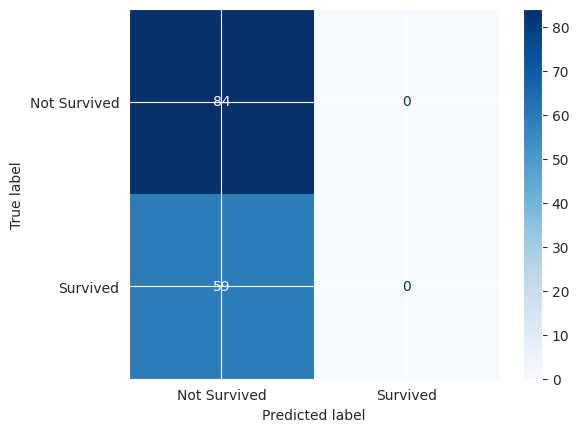

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_for_test[:len(y_test)])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()
